In [3]:
import json
path = '../pydata-book/datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]
len(records)

3560

In [4]:
# Python-style
from collections import Counter
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [5]:
from pandas import DataFrame, Series
import pandas as pd
data = DataFrame(records)
raw_tz = data['tz']
clean_tz = raw_tz.fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()[:10]
tz_counts

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

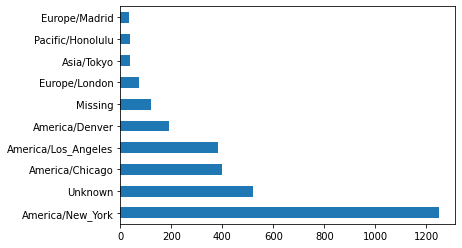

In [7]:
tz_counts.plot(kind='barh', rot=0)

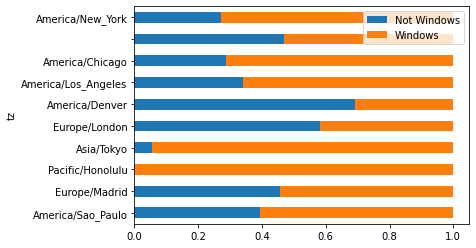

In [12]:
import numpy as np
cdata = data[data.a.notnull()]
operating_system = np.where(cdata['a'].str.contains('Windows'), 'Windows', 'Not Windows')
by_tz_os = cdata.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer)[-10:]
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)